In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Dataset paths
train_dir = r"C:\Users\rakti\Downloads\a\Final-project\Datasets\New Plant Disease Dataset ttv\train"
val_dir = r"C:\Users\rakti\Downloads\a\Final-project\Datasets\New Plant Disease Dataset ttv\test"
test_dir = r"C:\Users\rakti\Downloads\a\Final-project\Datasets\New Plant Disease Dataset ttv\val"

# Load datasets
train_data = datasets.ImageFolder(train_dir, transform=transform)
val_data = datasets.ImageFolder(val_dir, transform=transform)
test_data = datasets.ImageFolder(test_dir, transform=transform)

# Data loaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)



cuda


C:\Users\rakti\anaconda3\envs\power\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\rakti\anaconda3\envs\power\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1 | Train Acc: 0.7328 | Val Acc: 0.9180 | Train Loss: 0.9130 | Val Loss: 0.2742
Epoch 2 | Train Acc: 0.9282 | Val Acc: 0.9260 | Train Loss: 0.2252 | Val Loss: 0.2098
Epoch 3 | Train Acc: 0.9681 | Val Acc: 0.9291 | Train Loss: 0.1040 | Val Loss: 0.2197
Epoch 4 | Train Acc: 0.9850 | Val Acc: 0.9394 | Train Loss: 0.0516 | Val Loss: 0.2032
Epoch 5 | Train Acc: 0.9877 | Val Acc: 0.9372 | Train Loss: 0.0415 | Val Loss: 0.2076
Epoch 6 | Train Acc: 0.9878 | Val Acc: 0.9456 | Train Loss: 0.0396 | Val Loss: 0.1799
Epoch 7 | Train Acc: 0.9899 | Val Acc: 0.9225 | Train Loss: 0.0302 | Val Loss: 0.2655
Epoch 8 | Train Acc: 0.9889 | Val Acc: 0.9278 | Train Loss: 0.0336 | Val Loss: 0.2344
Epoch 9 | Train Acc: 0.9902 | Val Acc: 0.9430 | Train Loss: 0.0319 | Val Loss: 0.2021
Epoch 10 | Train Acc: 0.9913 | Val Acc: 0.9283 | Train Loss: 0.0278 | Val Loss: 0.2816
Epoch 11 | Train Acc: 0.9877 | Val Acc: 0.9318 | Train Loss: 0.0350 | Val Loss: 0.2573
Epoch 12 | Train Acc: 0.9875 | Val Acc: 0.9336 | Tra

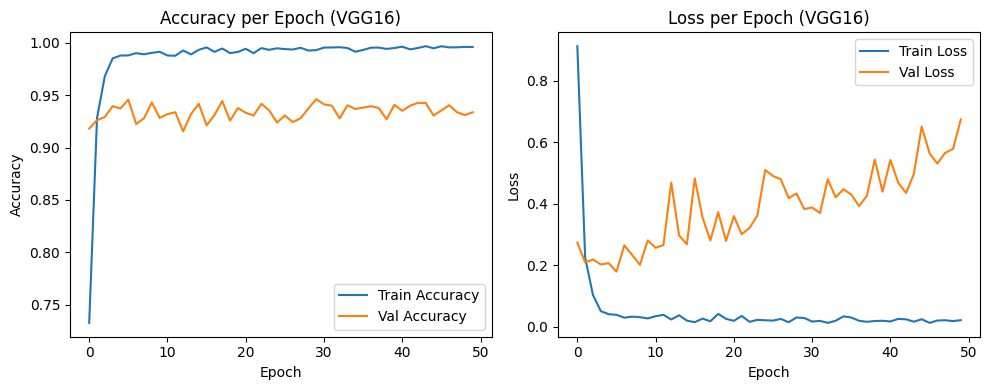


Test Accuracy: 0.9373
Precision: 0.9421
Recall: 0.9373
F1 Score: 0.9370


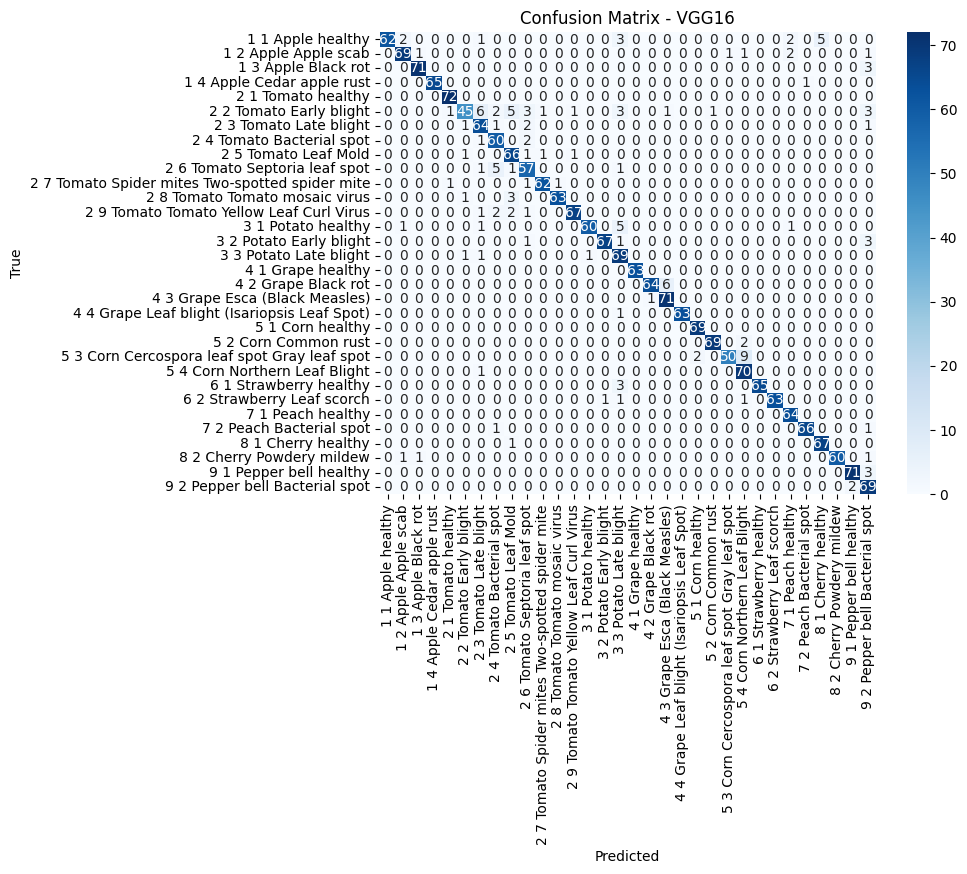

In [2]:
# Model
model = models.vgg16(pretrained=True)
for param in model.features.parameters():
    param.requires_grad = False

num_classes = len(train_data.classes)
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.0001)

# Training loop
num_epochs = 50
train_acc_vgg16, val_acc_vgg16 = [], []
train_loss_vgg16, val_loss_vgg16 = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_acc_vgg16.append(correct / total)
    train_loss_vgg16.append(running_loss / len(train_loader))

    # Validation
    model.eval()
    val_correct, val_total, val_loss_epoch = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss_epoch += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_acc_vgg16.append(val_correct / val_total)
    val_loss_vgg16.append(val_loss_epoch / len(val_loader))

    print(f"Epoch {epoch+1} | Train Acc: {train_acc_vgg16[-1]:.4f} | Val Acc: {val_acc_vgg16[-1]:.4f} | Train Loss: {train_loss_vgg16[-1]:.4f} | Val Loss: {val_loss_vgg16[-1]:.4f}")

# Accuracy plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_acc_vgg16, label='Train Accuracy')
plt.plot(val_acc_vgg16, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch (VGG16)')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(train_loss_vgg16, label='Train Loss')
plt.plot(val_loss_vgg16, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch (VGG16)')
plt.legend()
plt.tight_layout()
plt.show()

# Test Evaluation
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

# Metrics
acc_vgg16 = accuracy_score(all_labels, all_preds)
prec_vgg16 = precision_score(all_labels, all_preds, average='weighted')
rec_vgg16 = recall_score(all_labels, all_preds, average='weighted')
f1_vgg16 = f1_score(all_labels, all_preds, average='weighted')

print(f"\nTest Accuracy: {acc_vgg16:.4f}")
print(f"Precision: {prec_vgg16:.4f}")
print(f"Recall: {rec_vgg16:.4f}")
print(f"F1 Score: {f1_vgg16:.4f}")

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
class_names = train_data.classes

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - VGG16')
plt.show()


C:\Users\rakti\anaconda3\envs\power\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\rakti\anaconda3\envs\power\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1 | Train Acc: 0.7113 |  Val Acc: 0.8926 | Train Loss: 0.9798 | Val Loss: 0.3417
Epoch 2 | Train Acc: 0.9099 |  Val Acc: 0.9086 | Train Loss: 0.2799 | Val Loss: 0.2595
Epoch 3 | Train Acc: 0.9540 |  Val Acc: 0.9176 | Train Loss: 0.1388 | Val Loss: 0.2494
Epoch 4 | Train Acc: 0.9740 |  Val Acc: 0.9176 | Train Loss: 0.0802 | Val Loss: 0.2850
Epoch 5 | Train Acc: 0.9837 |  Val Acc: 0.9260 | Train Loss: 0.0497 | Val Loss: 0.2675
Epoch 6 | Train Acc: 0.9858 |  Val Acc: 0.9327 | Train Loss: 0.0433 | Val Loss: 0.2348
Epoch 7 | Train Acc: 0.9913 |  Val Acc: 0.9296 | Train Loss: 0.0322 | Val Loss: 0.2720
Epoch 8 | Train Acc: 0.9870 |  Val Acc: 0.9113 | Train Loss: 0.0398 | Val Loss: 0.3327
Epoch 9 | Train Acc: 0.9885 |  Val Acc: 0.9291 | Train Loss: 0.0366 | Val Loss: 0.2694
Epoch 10 | Train Acc: 0.9867 |  Val Acc: 0.8993 | Train Loss: 0.0398 | Val Loss: 0.4303
Epoch 11 | Train Acc: 0.9876 |  Val Acc: 0.9189 | Train Loss: 0.0435 | Val Loss: 0.3438
Epoch 12 | Train Acc: 0.9931 |  Val Acc: 

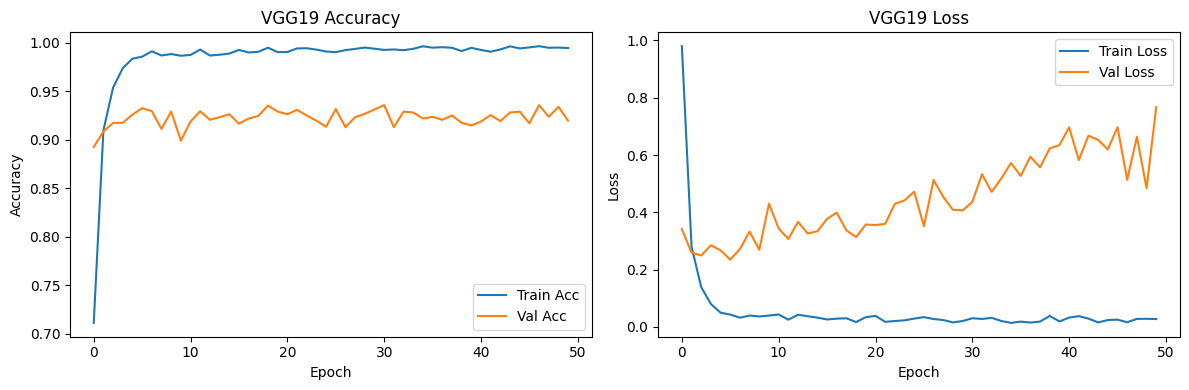


VGG19 Test Accuracy: 0.9150
Precision: 0.9251
Recall: 0.9150
F1 Score: 0.9163


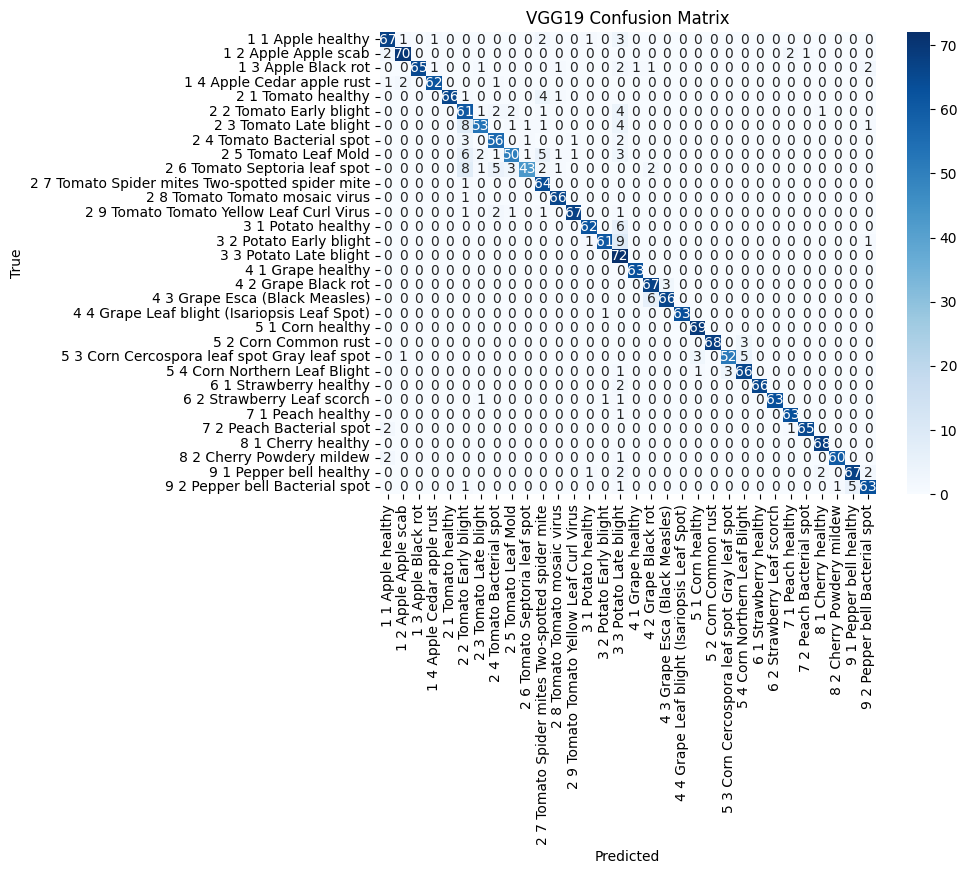

In [3]:
# VGG19 Model
from torchvision import models
import torch.nn as nn
import torch.optim as optim

model_vgg19 = models.vgg19(pretrained=True)
for param in model_vgg19.features.parameters():
    param.requires_grad = False

num_classes = len(train_data.classes)
model_vgg19.classifier[6] = nn.Linear(model_vgg19.classifier[6].in_features, num_classes)
model_vgg19 = model_vgg19.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_vgg19.classifier.parameters(), lr=0.0001)

train_acc_vgg19, val_acc_vgg19, train_loss_vgg19, val_loss_vgg19 = [], [], [], []

# Training loop for 50 epochs
num_epochs = 50
for epoch in range(num_epochs):
    model_vgg19.train()
    running_loss, correct, total = 0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_vgg19(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_acc_vgg19.append(correct / total)
    train_loss_vgg19.append(running_loss / len(train_loader))

    model_vgg19.eval()
    val_running_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_vgg19(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    val_acc_vgg19.append(val_correct / val_total)
    val_loss_vgg19.append(val_running_loss / len(val_loader))

    print(f"Epoch {epoch+1} | Train Acc: {train_acc_vgg19[-1]:.4f} |  Val Acc: {val_acc_vgg19[-1]:.4f} | Train Loss: {train_loss_vgg19[-1]:.4f} | Val Loss: {val_loss_vgg19[-1]:.4f}")

# Accuracy & Loss Graphs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_acc_vgg19, label="Train Acc")
plt.plot(val_acc_vgg19, label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("VGG19 Accuracy")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_loss_vgg19, label="Train Loss")
plt.plot(val_loss_vgg19, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("VGG19 Loss")
plt.legend()
plt.tight_layout()
plt.show()

# Test Metrics
model_vgg19.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model_vgg19(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

acc_vgg19 = accuracy_score(all_labels, all_preds)
prec_vgg19 = precision_score(all_labels, all_preds, average='weighted')
rec_vgg19 = recall_score(all_labels, all_preds, average='weighted')
f1_vgg19 = f1_score(all_labels, all_preds, average='weighted')

print(f"\nVGG19 Test Accuracy: {acc_vgg19:.4f}")
print(f"Precision: {prec_vgg19:.4f}")
print(f"Recall: {rec_vgg19:.4f}")
print(f"F1 Score: {f1_vgg19:.4f}")

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_data.classes,
            yticklabels=train_data.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('VGG19 Confusion Matrix')
plt.show()


C:\Users\rakti\anaconda3\envs\power\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\rakti\anaconda3\envs\power\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1 | Train Acc: 0.3799 |  Val Acc: 0.7001 | Train Loss: 2.9021 | Val Loss: 2.3000
Epoch 2 | Train Acc: 0.7803 |  Val Acc: 0.8601 | Train Loss: 1.9327 | Val Loss: 1.5251
Epoch 3 | Train Acc: 0.8601 |  Val Acc: 0.8922 | Train Loss: 1.3642 | Val Loss: 1.1107
Epoch 4 | Train Acc: 0.8885 |  Val Acc: 0.9122 | Train Loss: 1.0270 | Val Loss: 0.8391
Epoch 5 | Train Acc: 0.9040 |  Val Acc: 0.9202 | Train Loss: 0.8202 | Val Loss: 0.6851
Epoch 6 | Train Acc: 0.9136 |  Val Acc: 0.9323 | Train Loss: 0.6803 | Val Loss: 0.5734
Epoch 7 | Train Acc: 0.9225 |  Val Acc: 0.9354 | Train Loss: 0.5882 | Val Loss: 0.4975
Epoch 8 | Train Acc: 0.9228 |  Val Acc: 0.9407 | Train Loss: 0.5164 | Val Loss: 0.4473
Epoch 9 | Train Acc: 0.9302 |  Val Acc: 0.9447 | Train Loss: 0.4576 | Val Loss: 0.3956
Epoch 10 | Train Acc: 0.9384 |  Val Acc: 0.9443 | Train Loss: 0.4161 | Val Loss: 0.3591
Epoch 11 | Train Acc: 0.9388 |  Val Acc: 0.9483 | Train Loss: 0.3792 | Val Loss: 0.3256
Epoch 12 | Train Acc: 0.9423 |  Val Acc: 

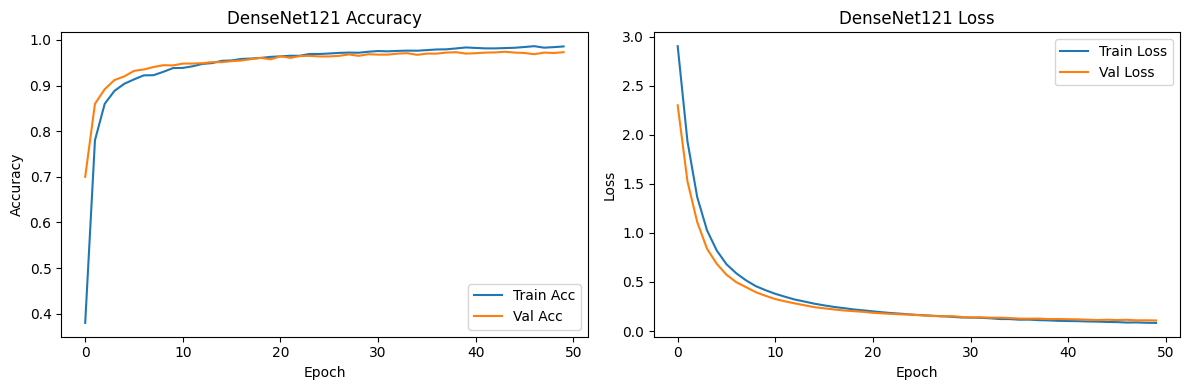


DenseNet121 Test Accuracy: 0.9696
Precision: 0.9704
Recall: 0.9696
F1 Score: 0.9696


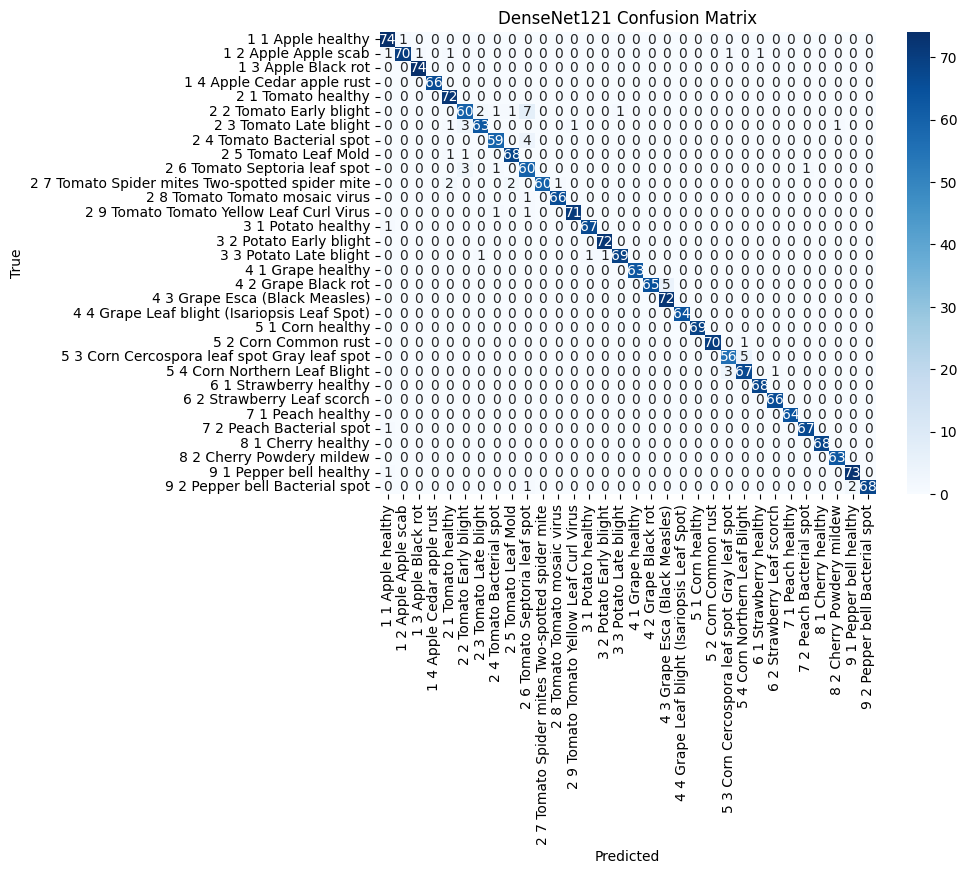

In [4]:
# DenseNet121 Model
from torchvision import models
import torch.nn as nn
import torch.optim as optim

model_dn121 = models.densenet121(pretrained=True)
for param in model_dn121.features.parameters():
    param.requires_grad = False

num_classes = len(train_data.classes)
model_dn121.classifier = nn.Linear(model_dn121.classifier.in_features, num_classes)
model_dn121 = model_dn121.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_dn121.classifier.parameters(), lr=0.0001)

train_acc_dn121, val_acc_dn121, train_loss_dn121, val_loss_dn121 = [], [], [], []

# Training loop for 50 epochs
num_epochs = 50
for epoch in range(num_epochs):
    model_dn121.train()
    running_loss, correct, total = 0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_dn121(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_acc_dn121.append(correct / total)
    train_loss_dn121.append(running_loss / len(train_loader))

    model_dn121.eval()
    val_running_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_dn121(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    val_acc_dn121.append(val_correct / val_total)
    val_loss_dn121.append(val_running_loss / len(val_loader))

    print(f"Epoch {epoch+1} | Train Acc: {train_acc_dn121[-1]:.4f} |  Val Acc: {val_acc_dn121[-1]:.4f} | Train Loss: {train_loss_dn121[-1]:.4f} | Val Loss: {val_loss_dn121[-1]:.4f}")

# Accuracy & Loss Graphs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_acc_dn121, label="Train Acc")
plt.plot(val_acc_dn121, label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("DenseNet121 Accuracy")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_loss_dn121, label="Train Loss")
plt.plot(val_loss_dn121, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("DenseNet121 Loss")
plt.legend()
plt.tight_layout()
plt.show()

# Test Metrics
model_dn121.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model_dn121(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

acc_dn121 = accuracy_score(all_labels, all_preds)
prec_dn121 = precision_score(all_labels, all_preds, average='weighted')
rec_dn121 = recall_score(all_labels, all_preds, average='weighted')
f1_dn121 = f1_score(all_labels, all_preds, average='weighted')

print(f"\nDenseNet121 Test Accuracy: {acc_dn121:.4f}")
print(f"Precision: {prec_dn121:.4f}")
print(f"Recall: {rec_dn121:.4f}")
print(f"F1 Score: {f1_dn121:.4f}")

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_data.classes,
            yticklabels=train_data.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('DenseNet121 Confusion Matrix')
plt.show()


C:\Users\rakti\anaconda3\envs\power\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\rakti\anaconda3\envs\power\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet169_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet169_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1 | Train Acc: 0.4945 |  Val Acc: 0.8035 | Train Loss: 2.7367 | Val Loss: 2.0248
Epoch 2 | Train Acc: 0.8401 |  Val Acc: 0.8930 | Train Loss: 1.6634 | Val Loss: 1.2730
Epoch 3 | Train Acc: 0.8992 |  Val Acc: 0.9220 | Train Loss: 1.1135 | Val Loss: 0.8707
Epoch 4 | Train Acc: 0.9176 |  Val Acc: 0.9354 | Train Loss: 0.8227 | Val Loss: 0.6583
Epoch 5 | Train Acc: 0.9273 |  Val Acc: 0.9443 | Train Loss: 0.6523 | Val Loss: 0.5336
Epoch 6 | Train Acc: 0.9367 |  Val Acc: 0.9492 | Train Loss: 0.5373 | Val Loss: 0.4382
Epoch 7 | Train Acc: 0.9408 |  Val Acc: 0.9519 | Train Loss: 0.4590 | Val Loss: 0.3759
Epoch 8 | Train Acc: 0.9471 |  Val Acc: 0.9550 | Train Loss: 0.3983 | Val Loss: 0.3380
Epoch 9 | Train Acc: 0.9504 |  Val Acc: 0.9550 | Train Loss: 0.3513 | Val Loss: 0.2993
Epoch 10 | Train Acc: 0.9553 |  Val Acc: 0.9599 | Train Loss: 0.3170 | Val Loss: 0.2716
Epoch 11 | Train Acc: 0.9582 |  Val Acc: 0.9603 | Train Loss: 0.2849 | Val Loss: 0.2504
Epoch 12 | Train Acc: 0.9609 |  Val Acc: 

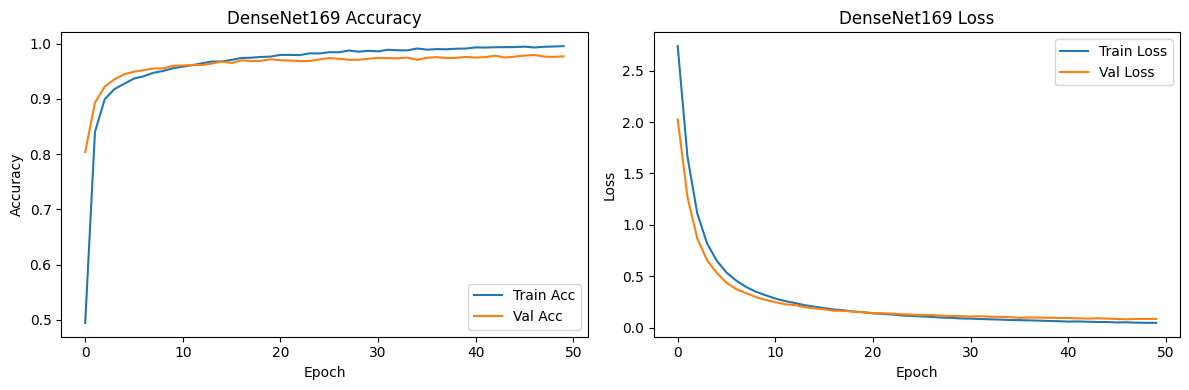


DenseNet169 Test Accuracy: 0.9750
Precision: 0.9753
Recall: 0.9750
F1 Score: 0.9749


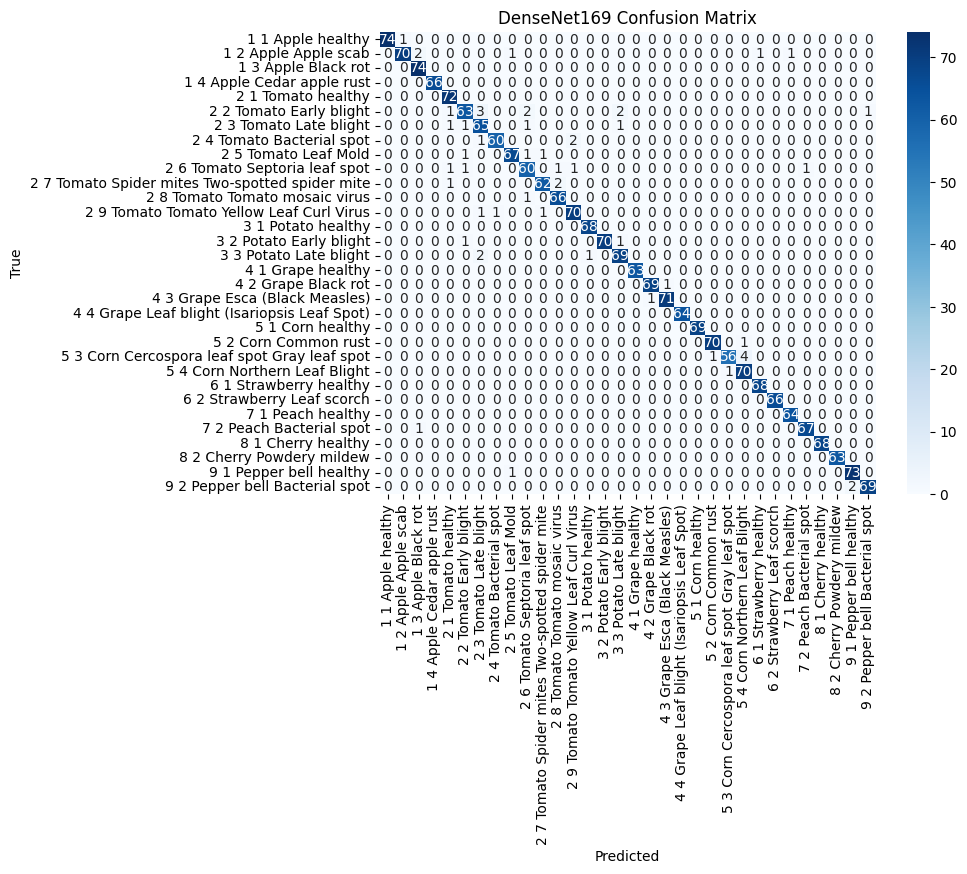

In [5]:
# DenseNet169 Model
from torchvision import models
import torch.nn as nn
import torch.optim as optim

model_dn169 = models.densenet169(pretrained=True)
for param in model_dn169.features.parameters():
    param.requires_grad = False

model_dn169.classifier = nn.Linear(model_dn169.classifier.in_features, num_classes)
model_dn169 = model_dn169.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_dn169.classifier.parameters(), lr=0.0001)

train_acc_dn169, val_acc_dn169, train_loss_dn169, val_loss_dn169 = [], [], [], []

# Training loop for 50 epochs
num_epochs = 50
for epoch in range(num_epochs):
    model_dn169.train()
    running_loss, correct, total = 0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_dn169(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_acc_dn169.append(correct / total)
    train_loss_dn169.append(running_loss / len(train_loader))

    model_dn169.eval()
    val_running_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_dn169(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    val_acc_dn169.append(val_correct / val_total)
    val_loss_dn169.append(val_running_loss / len(val_loader))

    print(f"Epoch {epoch+1} | Train Acc: {train_acc_dn169[-1]:.4f} |  Val Acc: {val_acc_dn169[-1]:.4f} | Train Loss: {train_loss_dn169[-1]:.4f} | Val Loss: {val_loss_dn169[-1]:.4f}")

# Accuracy & Loss Graphs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_acc_dn169, label="Train Acc")
plt.plot(val_acc_dn169, label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("DenseNet169 Accuracy")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_loss_dn169, label="Train Loss")
plt.plot(val_loss_dn169, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("DenseNet169 Loss")
plt.legend()
plt.tight_layout()
plt.show()

# Test Metrics
model_dn169.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model_dn169(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

acc_dn169 = accuracy_score(all_labels, all_preds)
prec_dn169 = precision_score(all_labels, all_preds, average='weighted')
rec_dn169 = recall_score(all_labels, all_preds, average='weighted')
f1_dn169 = f1_score(all_labels, all_preds, average='weighted')

print(f"\nDenseNet169 Test Accuracy: {acc_dn169:.4f}")
print(f"Precision: {prec_dn169:.4f}")
print(f"Recall: {rec_dn169:.4f}")
print(f"F1 Score: {f1_dn169:.4f}")

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_data.classes,
            yticklabels=train_data.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('DenseNet169 Confusion Matrix')
plt.show()


C:\Users\rakti\anaconda3\envs\power\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\rakti\anaconda3\envs\power\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1 | Train Acc: 0.5107 |  Val Acc: 0.8200 | Train Loss: 2.7360 | Val Loss: 2.0392
Epoch 2 | Train Acc: 0.8561 |  Val Acc: 0.9060 | Train Loss: 1.6658 | Val Loss: 1.2707
Epoch 3 | Train Acc: 0.8957 |  Val Acc: 0.9251 | Train Loss: 1.1165 | Val Loss: 0.8831
Epoch 4 | Train Acc: 0.9192 |  Val Acc: 0.9358 | Train Loss: 0.8215 | Val Loss: 0.6663
Epoch 5 | Train Acc: 0.9279 |  Val Acc: 0.9425 | Train Loss: 0.6522 | Val Loss: 0.5343
Epoch 6 | Train Acc: 0.9328 |  Val Acc: 0.9488 | Train Loss: 0.5419 | Val Loss: 0.4547
Epoch 7 | Train Acc: 0.9421 |  Val Acc: 0.9488 | Train Loss: 0.4587 | Val Loss: 0.3898
Epoch 8 | Train Acc: 0.9486 |  Val Acc: 0.9572 | Train Loss: 0.3985 | Val Loss: 0.3428
Epoch 9 | Train Acc: 0.9512 |  Val Acc: 0.9612 | Train Loss: 0.3527 | Val Loss: 0.3054
Epoch 10 | Train Acc: 0.9538 |  Val Acc: 0.9639 | Train Loss: 0.3199 | Val Loss: 0.2733
Epoch 11 | Train Acc: 0.9582 |  Val Acc: 0.9639 | Train Loss: 0.2863 | Val Loss: 0.2485
Epoch 12 | Train Acc: 0.9627 |  Val Acc: 

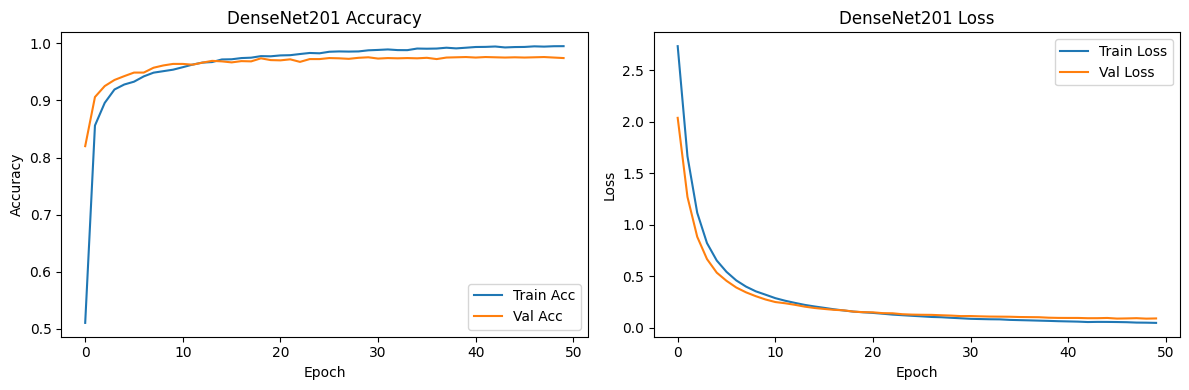


DenseNet201 Test Accuracy: 0.9773
Precision: 0.9778
Recall: 0.9773
F1 Score: 0.9772


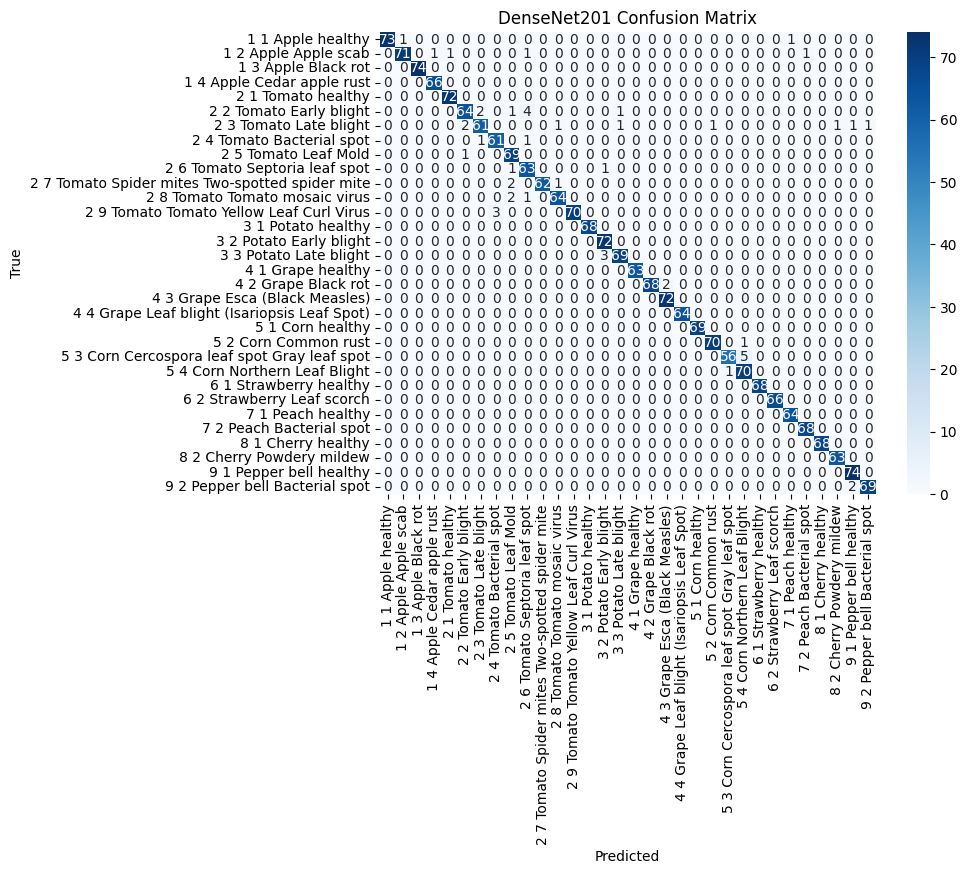

In [6]:
# DenseNet201 Model
from torchvision import models
import torch.nn as nn
import torch.optim as optim

model_dn201 = models.densenet201(pretrained=True)
for param in model_dn201.features.parameters():
    param.requires_grad = False

model_dn201.classifier = nn.Linear(model_dn201.classifier.in_features, num_classes)
model_dn201 = model_dn201.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_dn201.classifier.parameters(), lr=0.0001)

train_acc_dn201, val_acc_dn201 = [], []
train_loss_dn201, val_loss_dn201 = [], []

# Training loop for 50 epochs
num_epochs = 50
for epoch in range(num_epochs):
    model_dn201.train()
    running_loss, correct, total = 0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_dn201(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_acc_dn201.append(correct / total)
    train_loss_dn201.append(running_loss / len(train_loader))

    model_dn201.eval()
    val_running_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_dn201(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    val_acc_dn201.append(val_correct / val_total)
    val_loss_dn201.append(val_running_loss / len(val_loader))

    print(f"Epoch {epoch+1} | Train Acc: {train_acc_dn201[-1]:.4f} |  Val Acc: {val_acc_dn201[-1]:.4f} | Train Loss: {train_loss_dn201[-1]:.4f} | Val Loss: {val_loss_dn201[-1]:.4f}")

# Accuracy & Loss Graphs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_acc_dn201, label="Train Acc")
plt.plot(val_acc_dn201, label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("DenseNet201 Accuracy")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_loss_dn201, label="Train Loss")
plt.plot(val_loss_dn201, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("DenseNet201 Loss")
plt.legend()
plt.tight_layout()
plt.show()

# Test Metrics
model_dn201.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model_dn201(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

acc_dn201 = accuracy_score(all_labels, all_preds)
prec_dn201 = precision_score(all_labels, all_preds, average='weighted')
rec_dn201 = recall_score(all_labels, all_preds, average='weighted')
f1_dn201 = f1_score(all_labels, all_preds, average='weighted')

print(f"\nDenseNet201 Test Accuracy: {acc_dn201:.4f}")
print(f"Precision: {prec_dn201:.4f}")
print(f"Recall: {rec_dn201:.4f}")
print(f"F1 Score: {f1_dn201:.4f}")

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_data.classes,
            yticklabels=train_data.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('DenseNet201 Confusion Matrix')
plt.show()


C:\Users\rakti\anaconda3\envs\power\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\rakti\anaconda3\envs\power\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_S_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1 | Train Acc: 0.3230 |  Val Acc: 0.6399 | Train Loss: 3.0730 | Val Loss: 2.6867
Epoch 2 | Train Acc: 0.6651 |  Val Acc: 0.7518 | Train Loss: 2.3893 | Val Loss: 2.1039
Epoch 3 | Train Acc: 0.7440 |  Val Acc: 0.7892 | Train Loss: 1.9278 | Val Loss: 1.7212
Epoch 4 | Train Acc: 0.7769 |  Val Acc: 0.8053 | Train Loss: 1.6042 | Val Loss: 1.4586
Epoch 5 | Train Acc: 0.7941 |  Val Acc: 0.8222 | Train Loss: 1.3807 | Val Loss: 1.2649
Epoch 6 | Train Acc: 0.8071 |  Val Acc: 0.8449 | Train Loss: 1.2190 | Val Loss: 1.1060
Epoch 7 | Train Acc: 0.8205 |  Val Acc: 0.8534 | Train Loss: 1.0930 | Val Loss: 0.9953
Epoch 8 | Train Acc: 0.8277 |  Val Acc: 0.8685 | Train Loss: 0.9934 | Val Loss: 0.9028
Epoch 9 | Train Acc: 0.8344 |  Val Acc: 0.8721 | Train Loss: 0.9213 | Val Loss: 0.8139
Epoch 10 | Train Acc: 0.8393 |  Val Acc: 0.8685 | Train Loss: 0.8580 | Val Loss: 0.7971
Epoch 11 | Train Acc: 0.8458 |  Val Acc: 0.8792 | Train Loss: 0.8102 | Val Loss: 0.7290
Epoch 12 | Train Acc: 0.8509 |  Val Acc: 

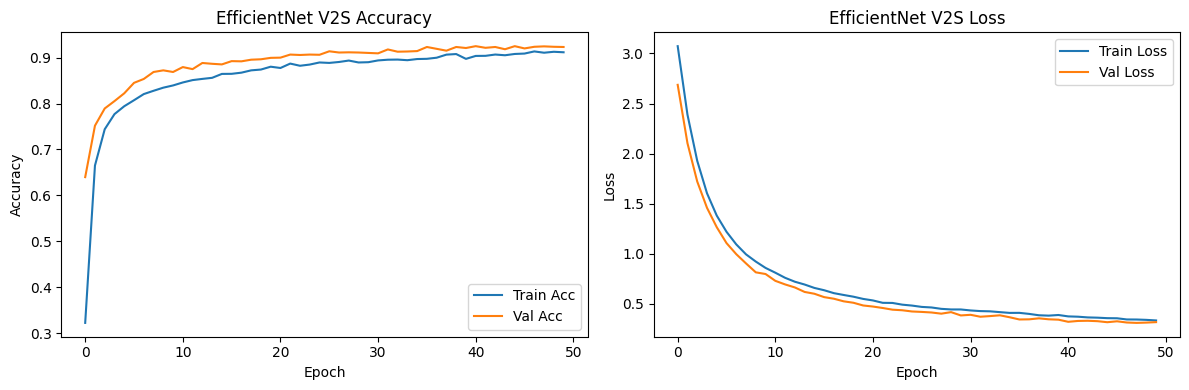


EfficientNet V2S Test Accuracy: 0.9141
Precision: 0.9135
Recall: 0.9141
F1 Score: 0.9133


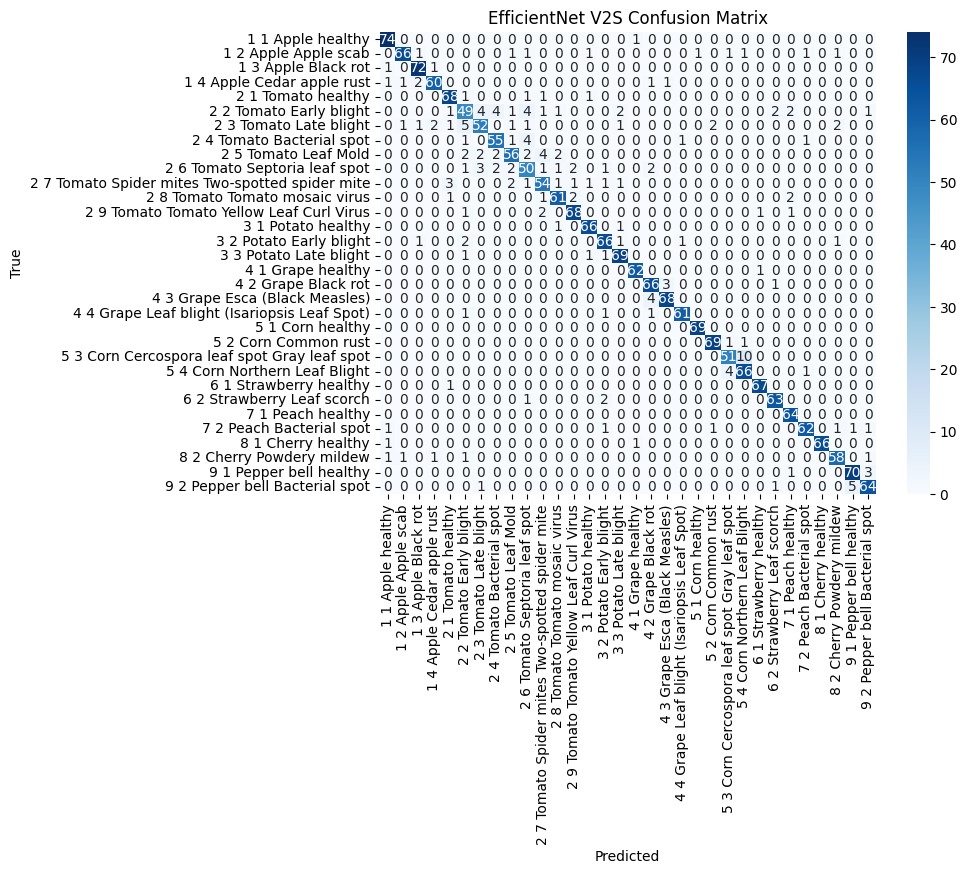

In [7]:
# EfficientNet V2S Model
from torchvision.models import efficientnet_v2_s

model_eff_s = efficientnet_v2_s(pretrained=True)
for param in model_eff_s.features.parameters():
    param.requires_grad = False

model_eff_s.classifier[1] = nn.Linear(model_eff_s.classifier[1].in_features, num_classes)
model_eff_s = model_eff_s.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_eff_s.classifier.parameters(), lr=0.0001)

train_acc_eff_s, val_acc_eff_s = [], []
train_loss_eff_s, val_loss_eff_s = [], []

# Training loop for 50 epochs
num_epochs = 50
for epoch in range(num_epochs):
    model_eff_s.train()
    running_loss, correct, total = 0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_eff_s(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_acc_eff_s.append(correct / total)
    train_loss_eff_s.append(running_loss / len(train_loader))

    model_eff_s.eval()
    val_running_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_eff_s(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    val_acc_eff_s.append(val_correct / val_total)
    val_loss_eff_s.append(val_running_loss / len(val_loader))

    print(f"Epoch {epoch+1} | Train Acc: {train_acc_eff_s[-1]:.4f} |  Val Acc: {val_acc_eff_s[-1]:.4f} | Train Loss: {train_loss_eff_s[-1]:.4f} | Val Loss: {val_loss_eff_s[-1]:.4f}")

# Accuracy & Loss Graphs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_acc_eff_s, label="Train Acc")
plt.plot(val_acc_eff_s, label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("EfficientNet V2S Accuracy")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_loss_eff_s, label="Train Loss")
plt.plot(val_loss_eff_s, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("EfficientNet V2S Loss")
plt.legend()
plt.tight_layout()
plt.show()

# Test Metrics
model_eff_s.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model_eff_s(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

acc_eff_s = accuracy_score(all_labels, all_preds)
prec_eff_s = precision_score(all_labels, all_preds, average='weighted')
rec_eff_s = recall_score(all_labels, all_preds, average='weighted')
f1_eff_s = f1_score(all_labels, all_preds, average='weighted')

print(f"\nEfficientNet V2S Test Accuracy: {acc_eff_s:.4f}")
print(f"Precision: {prec_eff_s:.4f}")
print(f"Recall: {rec_eff_s:.4f}")
print(f"F1 Score: {f1_eff_s:.4f}")

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_data.classes,
            yticklabels=train_data.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('EfficientNet V2S Confusion Matrix')
plt.show()


C:\Users\rakti\anaconda3\envs\power\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\rakti\anaconda3\envs\power\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_M_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_M_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_v2_m-dc08266a.pth" to C:\Users\rakti/.cache\torch\hub\checkpoints\efficientnet_v2_m-dc08266a.pth
100%|██████████| 208M/208M [02:24<00:00, 1.51MB/s] 


Epoch 1 | Train Acc: 0.2072 | Val Acc: 0.5129 | Train Loss: 3.2135 | Val Loss: 2.9006
Epoch 2 | Train Acc: 0.4994 | Val Acc: 0.6462 | Train Loss: 2.7248 | Val Loss: 2.4456
Epoch 3 | Train Acc: 0.6122 | Val Acc: 0.6996 | Train Loss: 2.3397 | Val Loss: 2.1142
Epoch 4 | Train Acc: 0.6581 | Val Acc: 0.7094 | Train Loss: 2.0532 | Val Loss: 1.8416
Epoch 5 | Train Acc: 0.6862 | Val Acc: 0.7242 | Train Loss: 1.8586 | Val Loss: 1.6627
Epoch 6 | Train Acc: 0.6965 | Val Acc: 0.7451 | Train Loss: 1.6853 | Val Loss: 1.5191
Epoch 7 | Train Acc: 0.7186 | Val Acc: 0.7536 | Train Loss: 1.5417 | Val Loss: 1.3909
Epoch 8 | Train Acc: 0.7348 | Val Acc: 0.7665 | Train Loss: 1.4408 | Val Loss: 1.2734
Epoch 9 | Train Acc: 0.7364 | Val Acc: 0.7745 | Train Loss: 1.3448 | Val Loss: 1.2160
Epoch 10 | Train Acc: 0.7505 | Val Acc: 0.7776 | Train Loss: 1.2732 | Val Loss: 1.1514
Epoch 11 | Train Acc: 0.7427 | Val Acc: 0.7857 | Train Loss: 1.2139 | Val Loss: 1.0858
Epoch 12 | Train Acc: 0.7615 | Val Acc: 0.7990 | Tra

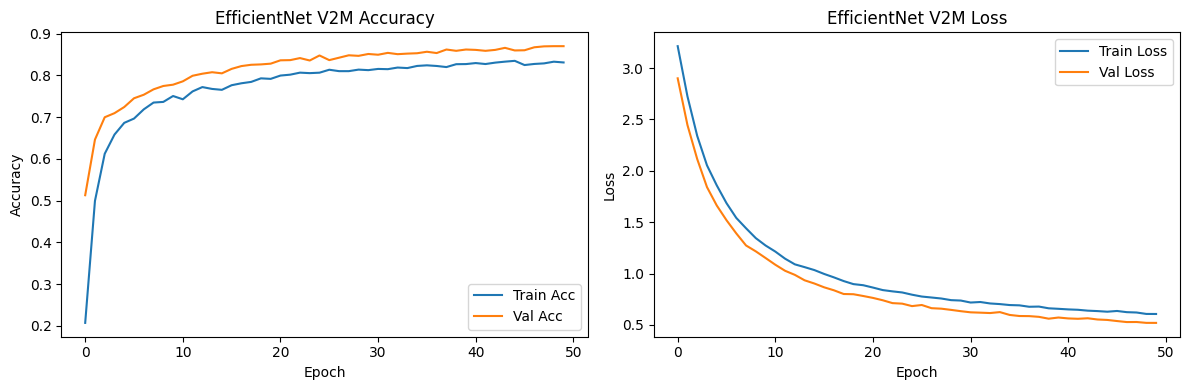


EfficientNet V2M Test Accuracy: 0.8546
Precision: 0.8542
Recall: 0.8546
F1 Score: 0.8519


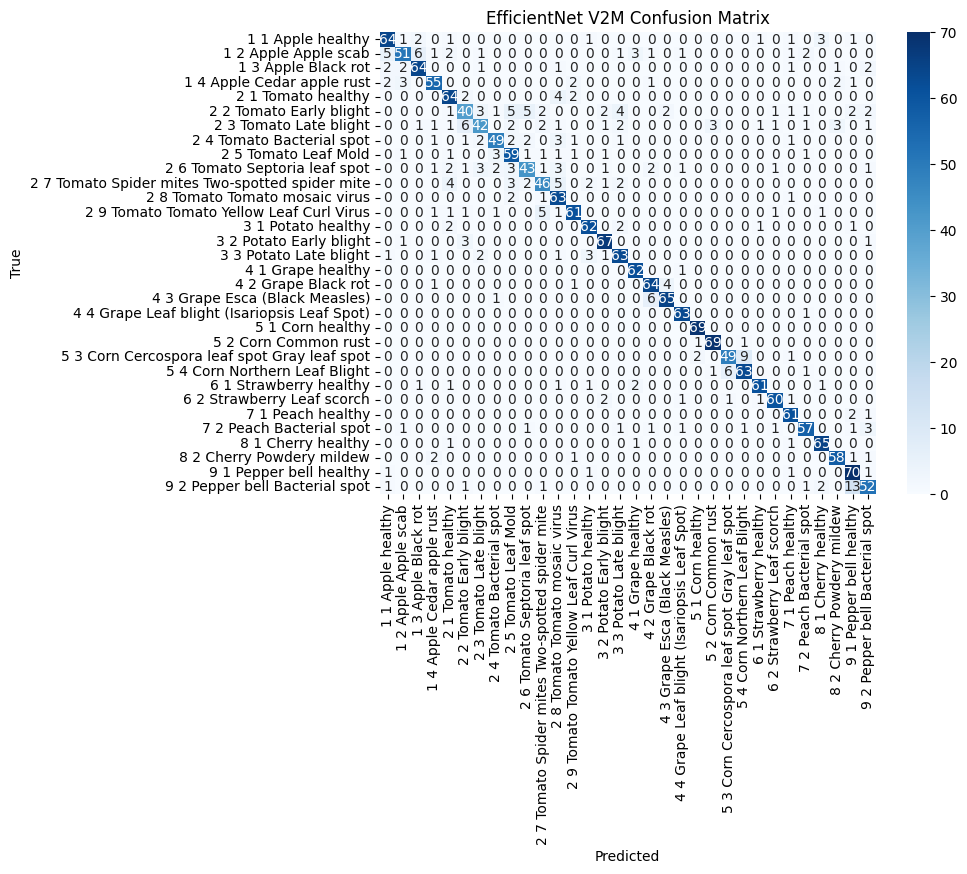

In [8]:
# EfficientNet V2M
from torchvision.models import efficientnet_v2_m

model_eff_m = efficientnet_v2_m(pretrained=True)
for param in model_eff_m.features.parameters():
    param.requires_grad = False

model_eff_m.classifier[1] = nn.Linear(model_eff_m.classifier[1].in_features, num_classes)
model_eff_m = model_eff_m.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_eff_m.classifier.parameters(), lr=0.0001)

train_acc_eff_m, val_acc_eff_m = [], []
train_loss_eff_m, val_loss_eff_m = [], []

for epoch in range(50):  # Set number of epochs to 50
    model_eff_m.train()
    running_loss, correct, total = 0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_eff_m(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_acc_eff_m.append(correct / total)
    train_loss_eff_m.append(running_loss / len(train_loader))

    model_eff_m.eval()
    val_running_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_eff_m(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    val_acc_eff_m.append(val_correct / val_total)
    val_loss_eff_m.append(val_running_loss / len(val_loader))

    print(f"Epoch {epoch+1} | Train Acc: {train_acc_eff_m[-1]:.4f} | Val Acc: {val_acc_eff_m[-1]:.4f} | Train Loss: {train_loss_eff_m[-1]:.4f} | Val Loss: {val_loss_eff_m[-1]:.4f}")

# Accuracy & Loss Graphs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_acc_eff_m, label="Train Acc")
plt.plot(val_acc_eff_m, label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("EfficientNet V2M Accuracy")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_loss_eff_m, label="Train Loss")
plt.plot(val_loss_eff_m, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("EfficientNet V2M Loss")
plt.legend()
plt.tight_layout()
plt.show()

# Test Metrics
model_eff_m.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model_eff_m(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

acc_eff_m = accuracy_score(all_labels, all_preds)
prec_eff_m = precision_score(all_labels, all_preds, average='weighted')
rec_eff_m = recall_score(all_labels, all_preds, average='weighted')
f1_eff_m = f1_score(all_labels, all_preds, average='weighted')

print(f"\nEfficientNet V2M Test Accuracy: {acc_eff_m:.4f}")
print(f"Precision: {prec_eff_m:.4f}")
print(f"Recall: {rec_eff_m:.4f}")
print(f"F1 Score: {f1_eff_m:.4f}")

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_data.classes,
            yticklabels=train_data.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('EfficientNet V2M Confusion Matrix')
plt.show()


C:\Users\rakti\anaconda3\envs\power\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\rakti\anaconda3\envs\power\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to C:\Users\rakti/.cache\torch\hub\checkpoints\mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:08<00:00, 1.76MB/s]


Epoch 1 | Train Acc: 0.4703 | Val Acc: 0.8222 | Train Loss: 2.6002 | Val Loss: 1.7787
Epoch 2 | Train Acc: 0.8127 | Val Acc: 0.8850 | Train Loss: 1.4752 | Val Loss: 1.0765
Epoch 3 | Train Acc: 0.8704 | Val Acc: 0.9104 | Train Loss: 0.9975 | Val Loss: 0.7525
Epoch 4 | Train Acc: 0.8861 | Val Acc: 0.9216 | Train Loss: 0.7680 | Val Loss: 0.5882
Epoch 5 | Train Acc: 0.9051 | Val Acc: 0.9318 | Train Loss: 0.6141 | Val Loss: 0.4791
Epoch 6 | Train Acc: 0.9106 | Val Acc: 0.9340 | Train Loss: 0.5249 | Val Loss: 0.4137
Epoch 7 | Train Acc: 0.9186 | Val Acc: 0.9389 | Train Loss: 0.4620 | Val Loss: 0.3638
Epoch 8 | Train Acc: 0.9226 | Val Acc: 0.9421 | Train Loss: 0.4148 | Val Loss: 0.3276
Epoch 9 | Train Acc: 0.9313 | Val Acc: 0.9465 | Train Loss: 0.3748 | Val Loss: 0.2964
Epoch 10 | Train Acc: 0.9354 | Val Acc: 0.9519 | Train Loss: 0.3424 | Val Loss: 0.2711
Epoch 11 | Train Acc: 0.9398 | Val Acc: 0.9537 | Train Loss: 0.3169 | Val Loss: 0.2553
Epoch 12 | Train Acc: 0.9391 | Val Acc: 0.9496 | Tra

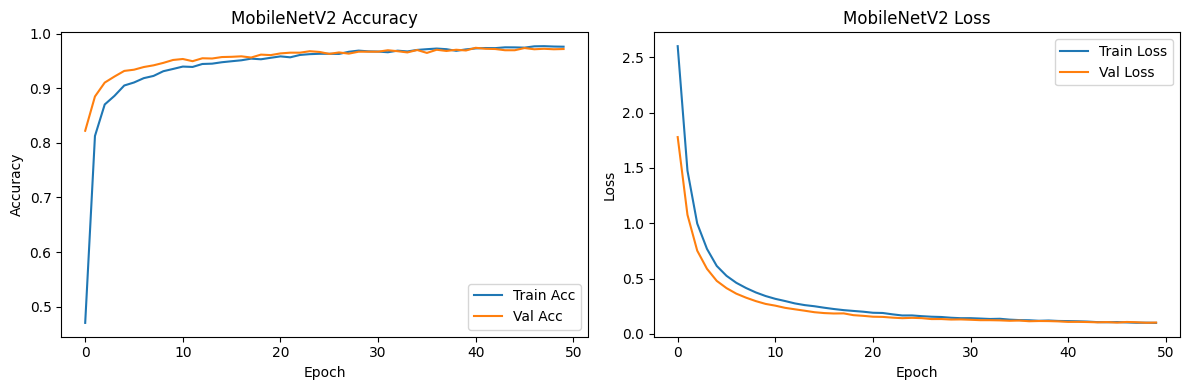


MobileNetV2 Test Accuracy: 0.9614
Precision: 0.9616
Recall: 0.9614
F1 Score: 0.9612


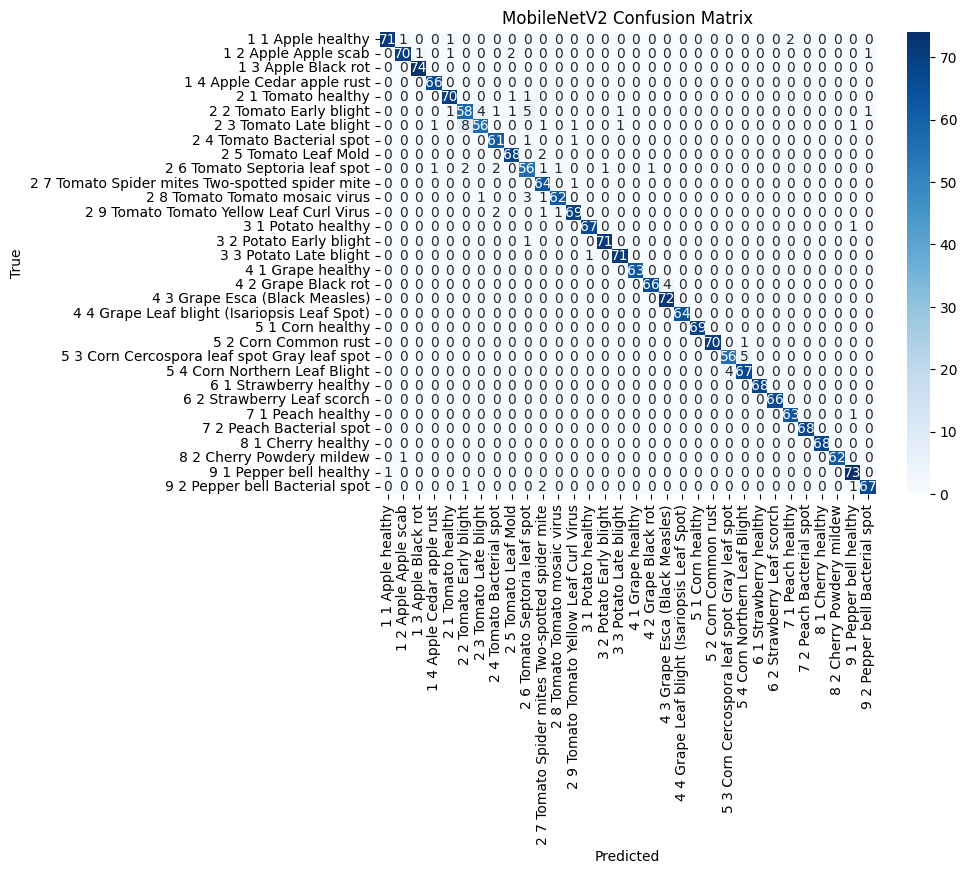

In [9]:
# MobileNetV2
from torchvision.models import mobilenet_v2

model_mob = mobilenet_v2(pretrained=True)
for param in model_mob.features.parameters():
    param.requires_grad = False

model_mob.classifier[1] = nn.Linear(model_mob.classifier[1].in_features, num_classes)
model_mob = model_mob.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_mob.classifier.parameters(), lr=0.0001)

train_acc_mob, val_acc_mob = [], []
train_loss_mob, val_loss_mob = [], []

for epoch in range(50):  # Fixed to 50 epochs
    model_mob.train()
    running_loss, correct, total = 0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_mob(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_acc_mob.append(correct / total)
    train_loss_mob.append(running_loss / len(train_loader))

    model_mob.eval()
    val_running_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_mob(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    val_acc_mob.append(val_correct / val_total)
    val_loss_mob.append(val_running_loss / len(val_loader))

    print(f"Epoch {epoch+1} | Train Acc: {train_acc_mob[-1]:.4f} | Val Acc: {val_acc_mob[-1]:.4f} | Train Loss: {train_loss_mob[-1]:.4f} | Val Loss: {val_loss_mob[-1]:.4f}")

# Accuracy & Loss Graphs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_acc_mob, label="Train Acc")
plt.plot(val_acc_mob, label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("MobileNetV2 Accuracy")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_loss_mob, label="Train Loss")
plt.plot(val_loss_mob, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("MobileNetV2 Loss")
plt.legend()
plt.tight_layout()
plt.show()

# Test Metrics
model_mob.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model_mob(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

acc_mob = accuracy_score(all_labels, all_preds)
prec_mob = precision_score(all_labels, all_preds, average='weighted')
rec_mob = recall_score(all_labels, all_preds, average='weighted')
f1_mob = f1_score(all_labels, all_preds, average='weighted')

print(f"\nMobileNetV2 Test Accuracy: {acc_mob:.4f}")
print(f"Precision: {prec_mob:.4f}")
print(f"Recall: {rec_mob:.4f}")
print(f"F1 Score: {f1_mob:.4f}")

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_data.classes,
            yticklabels=train_data.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('MobileNetV2 Confusion Matrix')
plt.show()


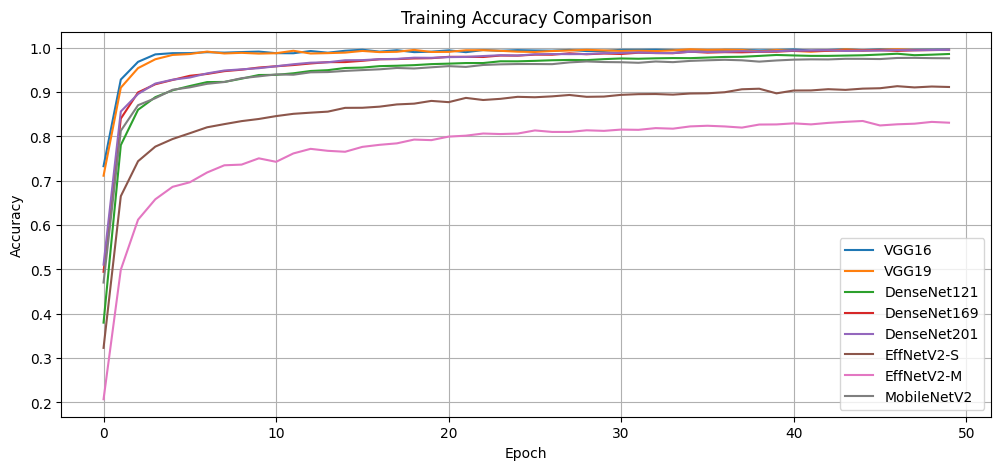

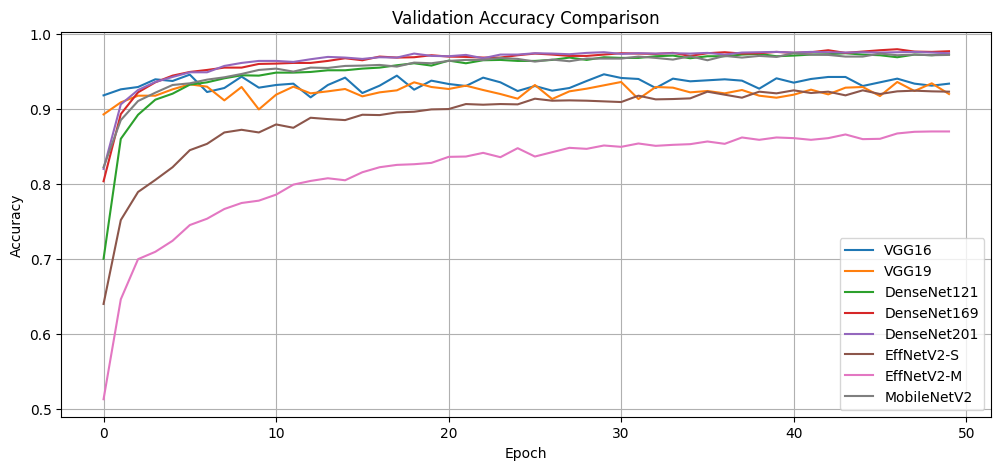

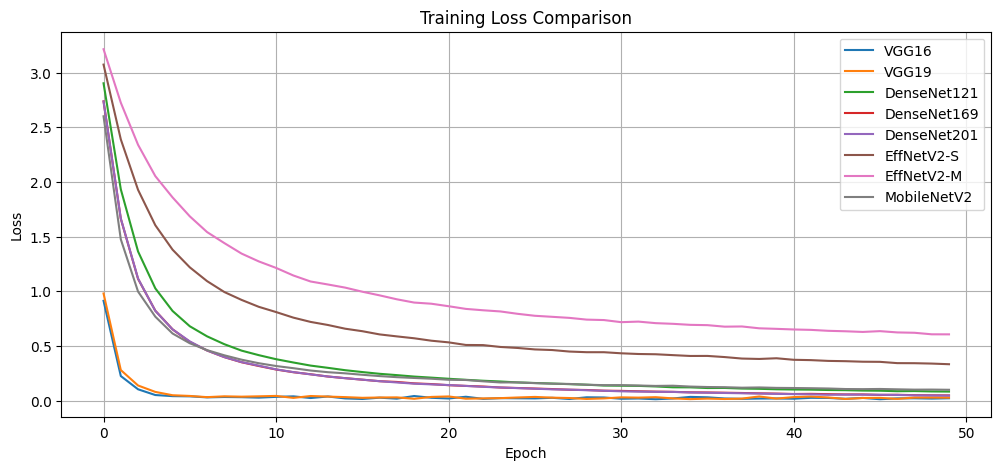

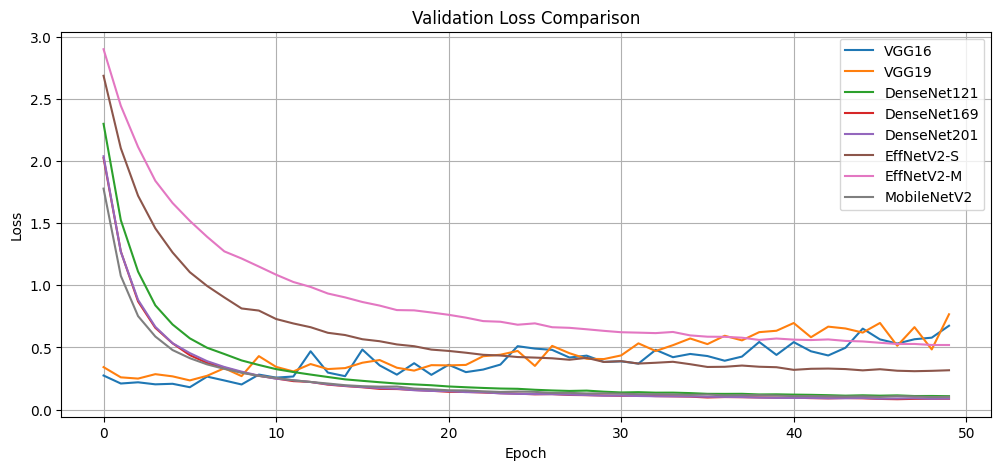

In [10]:
# Model Names (excluding InceptionV3 and GoogLeNet)
model_names = [
    'VGG16', 'VGG19', 'DenseNet121', 'DenseNet169', 'DenseNet201',
    'EffNetV2-S', 'EffNetV2-M', 'MobileNetV2'
]

# Training & Validation Accuracy (excluding InceptionV3 and GoogLeNet)
all_train_acc = [
    train_acc_vgg16, train_acc_vgg19, train_acc_dn121, train_acc_dn169, train_acc_dn201,
    train_acc_eff_s, train_acc_eff_m, train_acc_mob
]

all_val_acc = [
    val_acc_vgg16, val_acc_vgg19, val_acc_dn121, val_acc_dn169, val_acc_dn201,
    val_acc_eff_s, val_acc_eff_m, val_acc_mob
]

# Training & Validation Loss (excluding InceptionV3 and GoogLeNet)
all_train_loss = [
    train_loss_vgg16, train_loss_vgg19, train_loss_dn121, train_loss_dn169, train_loss_dn201,
    train_loss_eff_s, train_loss_eff_m, train_loss_mob
]

all_val_loss = [
    val_loss_vgg16, val_loss_vgg19, val_loss_dn121, val_loss_dn169, val_loss_dn201,
    val_loss_eff_s, val_loss_eff_m, val_loss_mob
]

# Accuracy Comparison Plot
plt.figure(figsize=(12, 5))
for acc, name in zip(all_train_acc, model_names):
    plt.plot(acc, label=f'{name}')
plt.title("Training Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
for acc, name in zip(all_val_acc, model_names):
    plt.plot(acc, label=f'{name}')
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Loss Comparison Plot
plt.figure(figsize=(12, 5))
for loss, name in zip(all_train_loss, model_names):
    plt.plot(loss, label=f'{name}')
plt.title("Training Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
for loss, name in zip(all_val_loss, model_names):
    plt.plot(loss, label=f'{name}')
plt.title("Validation Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


Model,Accuracy,Precision,Recall,F1-Score
VGG16,93.73,0.9421,0.9373,0.9370
VGG19,91.50,0.9251,0.9150,0.9163
DenseNet121,96.96,0.9704,0.9696,0.9696
DenseNet169,97.50,0.9753,0.9750,0.9749
DenseNet201,97.73,0.9778,0.9773,0.9772
EffNetV2-S,91.41,0.9135,0.9141,0.9133
EffNetV2-M,85.46,0.8542,0.8546,0.8519
MobileNetV2,96.14,0.9616,0.9614,0.9612


C:\Users\rakti\AppData\Local\Temp\ipykernel_19100\2195684996.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=summary_df, palette='viridis')
C:\Users\rakti\AppData\Local\Temp\ipykernel_19100\2195684996.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=summary_df, palette='viridis')
C:\Users\rakti\AppData\Local\Temp\ipykernel_19100\2195684996.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=summary_df, palette='viridis')
C:\Users\rakti\AppData\Local\Temp\

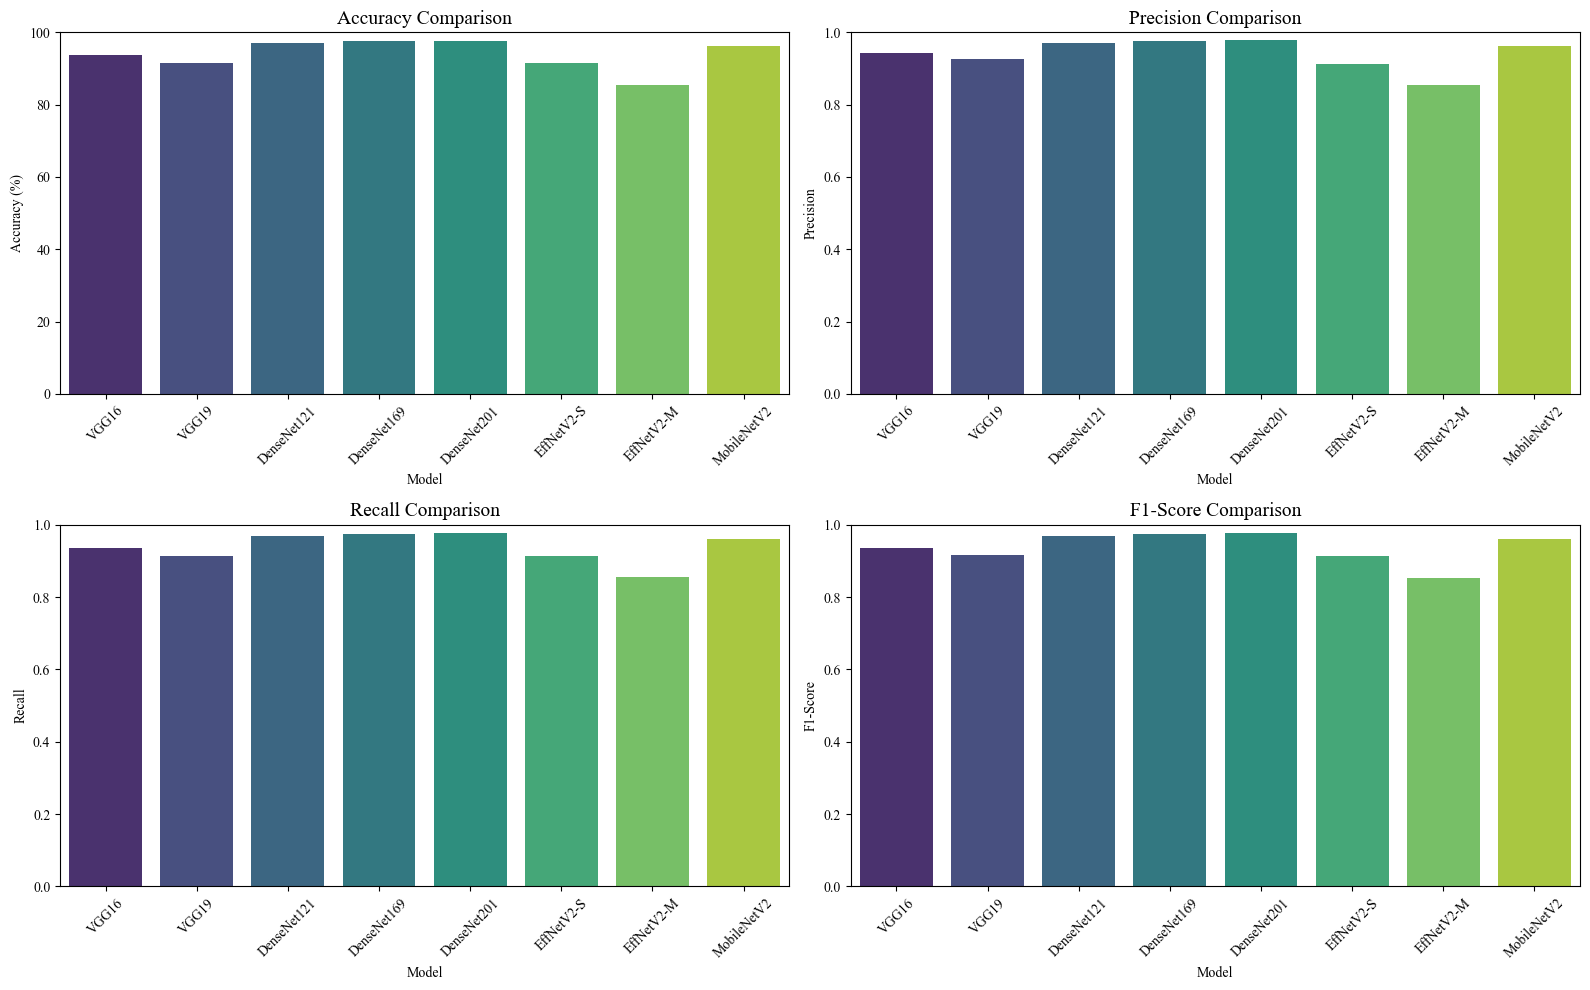

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Model Names
model_names = [
    'VGG16', 'VGG19', 'DenseNet121', 'DenseNet169', 'DenseNet201',
    'EffNetV2-S', 'EffNetV2-M', 'MobileNetV2'
]

# Replace these with your actual metric values
summary_data = {
    'Model': model_names,
    'Accuracy': [
        acc_vgg16, acc_vgg19, acc_dn121, acc_dn169, acc_dn201,
        acc_eff_s, acc_eff_m, acc_mob
    ],
    'Precision': [
        prec_vgg16, prec_vgg19, prec_dn121, prec_dn169, prec_dn201,
        prec_eff_s, prec_eff_m, prec_mob
    ],
    'Recall': [
        rec_vgg16, rec_vgg19, rec_dn121, rec_dn169, rec_dn201,
        rec_eff_s, rec_eff_m, rec_mob
    ],
    'F1-Score': [
        f1_vgg16, f1_vgg19, f1_dn121, f1_dn169, f1_dn201,
        f1_eff_s, f1_eff_m, f1_mob
    ]
}

# Create DataFrame
summary_df = pd.DataFrame(summary_data)

# Format Accuracy to percentage (2 decimal places)
summary_df['Accuracy'] = (summary_df['Accuracy'] * 100).round(2)

# Round other metrics to 4 decimal places
for metric in ['Precision', 'Recall', 'F1-Score']:
    summary_df[metric] = summary_df[metric].round(4)

# Display Table with Times New Roman and Column Spacing
from IPython.display import display, HTML

html_table = summary_df.to_html(index=False)
styled_html = f"""
<style>
    table {{
        font-family: 'Times New Roman';
        font-size: 14px;
        border-collapse: separate;
        border-spacing: 30px 5px;
    }}
    th, td {{
        padding: 8px 20px;
        text-align: center;
    }}
</style>
{html_table}
"""
display(HTML(styled_html))

# Set global font for plots
plt.rcParams["font.family"] = "Times New Roman"

# Bar Plot for Each Metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
plt.figure(figsize=(16, 10))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x='Model', y=metric, data=summary_df, palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f'{metric} Comparison', fontsize=14)
    plt.ylabel(f'{metric} (%)' if metric == 'Accuracy' else metric)
    plt.ylim(0, 100 if metric == 'Accuracy' else 1)
plt.tight_layout()
plt.show()
